In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_venice_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Venice')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/venice_{date}.csv',index=False)
get_listings_venice_timeseries()

In [4]:
# pull in detailed_listings
raw_df_venice = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_venice)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(venice_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 7370 AirBnb listings.


In [5]:
venice_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2020-12.csv')
venice_raw_df_12_12_2020.shape





(8090, 16)

In [6]:
# use magic commands 'cd' to change directory
# use glob to locate all files for venice
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_venice = glob.glob('venice/**.csv')
files_venice

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['venice/Venice_2021-11.csv',
 'venice/Venice_2021-05.csv',
 'venice/Venice_2021-04.csv',
 'venice/Venice_2021-10.csv',
 'venice/Venice_2021-06.csv',
 'venice/Venice_2021-07.csv',
 'venice/Venice_2021-03.csv',
 'venice/Venice_2021-02.csv',
 'venice/Venice_2021-01.csv',
 'venice/Venice_2020-12.csv',
 'venice/Venice_2021-09.csv',
 'venice/Venice_2021-08.csv']

In [7]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

venice_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(venice_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(venice_raw_df_12_12_2020['price'].mean(),2)}.")

venice_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(venice_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_1_9_2021['price'].mean(),2)}.")

venice_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(venice_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_2_8_2021['price'].mean(),2)}.")

venice_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(venice_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_3_4_2021['price'].mean(),2)}.")

venice_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(venice_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_4_9_2021['price'].mean(),2)}.")

venice_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-05.csv')
print(f"The 5_19_2021 dataset contains {len(venice_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_5_19_2021['price'].mean(),2)}.")

venice_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(venice_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_6_3_2021['price'].mean(),2)}.")

venice_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(venice_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_7_4_2021['price'].mean(),2)}.")

venice_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(venice_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_8_6_2021['price'].mean(),2)}.")

venice_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(venice_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_9_7_2021['price'].mean(),2)}.")

venice_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(venice_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_10_6_2021['price'].mean(),2)}.")

#venice_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(venice_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(venice_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 8090 AirBnb listings; the avg price is €124.89.
The 1_9_2021 dataset contains 8074 AirBnb listings; the avg price is €132.38.
The 2_8_2021 dataset contains 7951 AirBnb listings; the avg price is €136.15.
The 3_4_2021 dataset contains 7917 AirBnb listings; the avg price is €129.93.
The 4_9_2021 dataset contains 7823 AirBnb listings; the avg price is €137.06.
The 5_19_2021 dataset contains 7747 AirBnb listings; the avg price is €141.1.
The 6_3_2021 dataset contains 7707 AirBnb listings; the avg price is €139.5.
The 7_4_2021 dataset contains 7934 AirBnb listings; the avg price is €150.21.
The 8_6_2021 dataset contains 7947 AirBnb listings; the avg price is €153.62.
The 9_7_2021 dataset contains 7631 AirBnb listings; the avg price is €153.0.
The 10_6_2021 dataset contains 7568 AirBnb listings; the avg price is €143.29.


In [17]:
df_list_venice = [venice_raw_df_12_12_2020, venice_raw_df_1_9_2021, venice_raw_df_2_8_2021,
           venice_raw_df_3_4_2021, venice_raw_df_4_9_2021, venice_raw_df_5_19_2021, venice_raw_df_6_3_2021, venice_raw_df_7_4_2021,
           venice_raw_df_8_6_2021, venice_raw_df_9_7_2021, venice_raw_df_10_6_2021]

dates_venice = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '05_19_2021', '06_03_2021'
         '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_venice = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06','2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_venice = []

def airbnb_parse_venice(df_list, files):
    for file in files_venice:

        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_{file}.csv")
        print(f"The {file} venice dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_venice(df_list, dates):
    for file in files_venice:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/venice/venice_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_venice.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_venice)

venice_parse = airbnb_parse_venice(df_list_venice, files_venice)


The 2020-12 venice dataset contains 8090 AirBnb listings -- the avg price is €124.89.
The 2021-01 venice dataset contains 8074 AirBnb listings -- the avg price is €132.38.
The 2021-02 venice dataset contains 7951 AirBnb listings -- the avg price is €136.15.
The 2021-03 venice dataset contains 7917 AirBnb listings -- the avg price is €129.93.
The 2021-04 venice dataset contains 7823 AirBnb listings -- the avg price is €137.06.
The 2021-05 venice dataset contains 7747 AirBnb listings -- the avg price is €141.1.
The 2021-06 venice dataset contains 7707 AirBnb listings -- the avg price is €139.5.
The 2021-07 venice dataset contains 7934 AirBnb listings -- the avg price is €150.21.
The 2021-08 venice dataset contains 7947 AirBnb listings -- the avg price is €153.62.
The 2021-09 venice dataset contains 7631 AirBnb listings -- the avg price is €153.0.
The 2021-10 venice dataset contains 7568 AirBnb listings -- the avg price is €143.29.


In [18]:
venice_summary = airbnb_to_frame_venice(df_list_venice, files_venice)
venice_summary['Date of scrape'] = pd.to_datetime(venice_summary['Date of scrape'])
venice_summary['City'] = 'Venice'
venice_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,8090,124.89,88.0,0,9999,1.59,Venice
1,2021-01-01,8074,132.38,91.0,0,9999,1.54,Venice
2,2021-02-01,7951,136.15,99.0,0,9999,1.50,Venice
3,2021-03-01,7917,129.93,90.0,0,9999,1.47,Venice
4,2021-04-01,7823,137.06,99.0,0,9999,1.41,Venice
5,2021-05-01,7747,141.10,100.0,0,9999,1.38,Venice
6,2021-06-01,7707,139.50,100.0,0,9999,1.43,Venice
7,2021-07-01,7934,150.21,101.0,0,9999,1.45,Venice
8,2021-08-01,7947,153.62,106.0,0,9999,1.53,Venice
9,2021-09-01,7631,153.00,113.0,0,9999,1.64,Venice


In [19]:
master_df_venice = pd.concat(df_list_venice)
master_df_venice_unique = master_df_venice.drop_duplicates(subset='id')
master_df_venice_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6623,Venice Blue on Canal apartment,15016,Francesca,Isole,San Polo,45.43823,12.32902,Entire home/apt,225,7,162,2019-11-06,1.20,3,328,NaN,NaN
1,6624,Venice garden charme and canal view!,15016,Francesca,Isole,Santa Croce,45.43971,12.32799,Entire home/apt,250,7,64,2019-11-03,0.57,3,0,NaN,NaN
2,12074,Venice home to relax and emotions,15016,Francesca,Isole,Santa Croce,45.44049,12.32877,Entire home/apt,122,4,184,2019-10-07,1.42,3,332,NaN,NaN
3,27116,Charming room with balcony close to S. Mark's,116144,Gianni,Isole,San Marco,45.43221,12.33411,Private room,120,1,410,2020-02-21,3.25,2,343,NaN,NaN
4,44527,Historical Luxury Apartment on Calm Sunny Canal,120215,Marc & Elisabeth,Isole,Cannaregio,45.44754,12.32918,Entire home/apt,214,2,72,2020-01-04,0.61,1,363,NaN,NaN


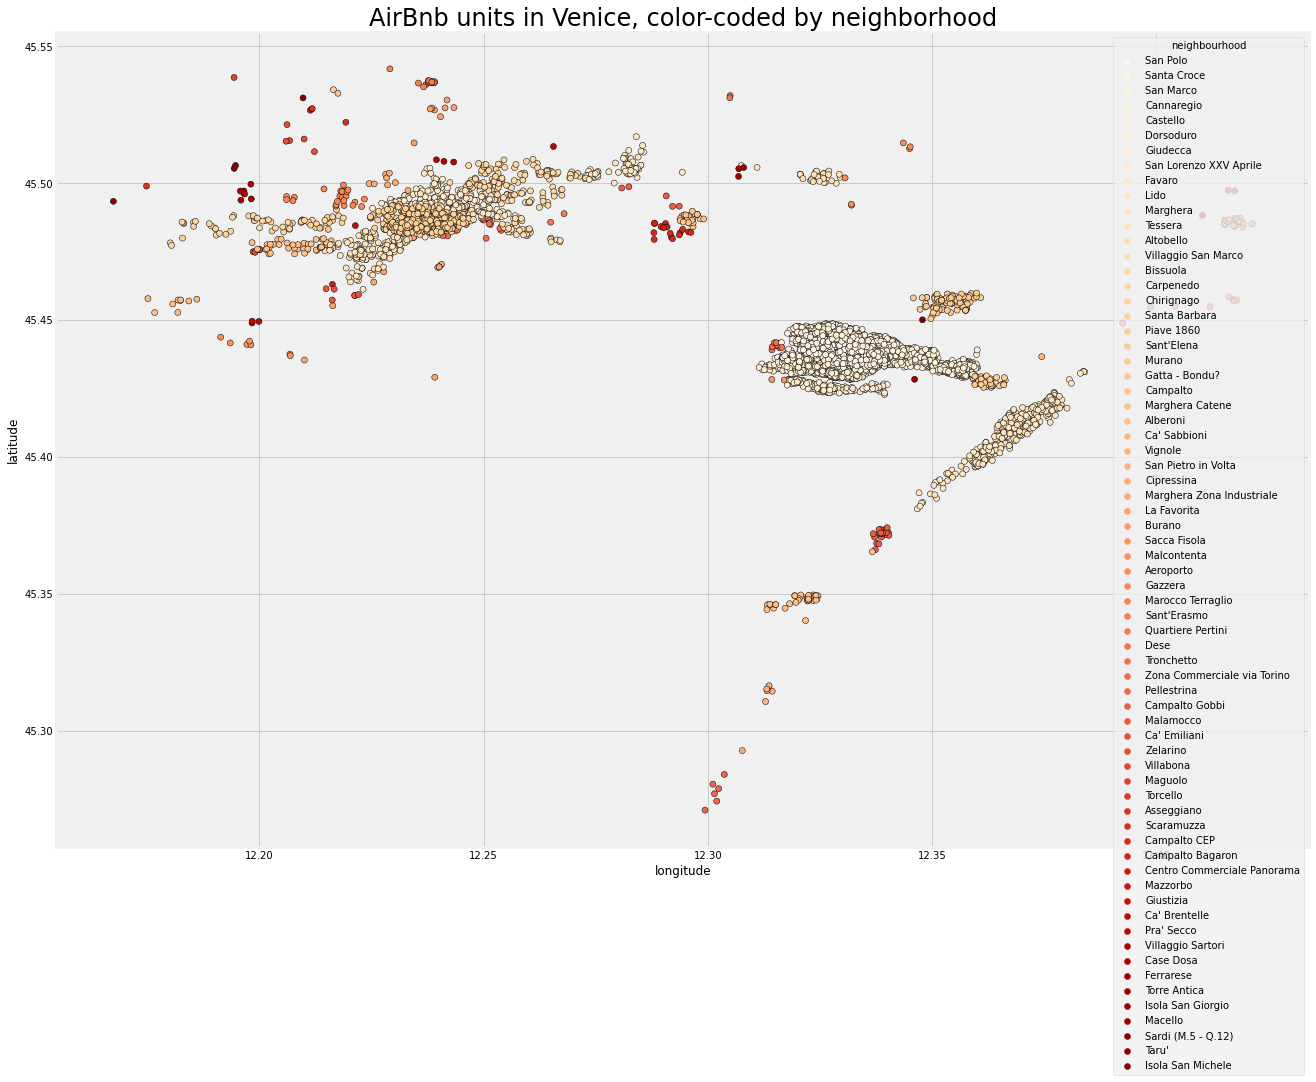

In [20]:
title = 'AirBnb units in Venice, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_venice_unique.longitude, master_df_venice_unique.latitude, hue = master_df_venice_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_venice.png')
plt.show()

## Add review data through a join

In [21]:
df_reviews = pd.concat([venice_raw_df_10_6_2021,raw_df_venice],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,6623,Venice Blue on Canal apartment,15016,Francesca,Isole,San Polo,45.438170,12.327390,Entire home/apt,225,...,4.96,4.99,4.88,4.85,4.96,4.92,f,3.0,0.0,0.0
1,6624,Venice garden charme and canal view!,15016,Francesca,Isole,Santa Croce,45.439770,12.327360,Entire home/apt,250,...,4.95,4.97,4.93,4.85,4.93,4.92,f,3.0,0.0,0.0
2,12074,Venice home to relax and emotions,15016,Francesca,Isole,San Polo,45.438960,12.329700,Entire home/apt,122,...,4.94,4.98,4.89,4.87,4.88,4.89,f,3.0,0.0,0.0
3,27116,Junior Suite with balcony overlooking canal,116144,Giò&Giò,Isole,San Marco,45.432770,12.334560,Private room,210,...,4.83,4.90,4.77,4.80,4.93,4.77,t,0.0,2.0,0.0
4,44527,Historical Luxury Apartment on Calm Sunny Canal,120215,Marc & Elisabeth,Isole,Cannaregio,45.445690,12.329020,Entire home/apt,280,...,4.80,4.75,4.97,4.95,4.88,4.65,t,1.0,0.0,0.0
5,44998,Furlani Loft for up to 6,198581,Laura,Isole,Castello,45.437850,12.349320,Entire home/apt,169,...,4.94,4.99,4.98,4.98,4.94,4.85,t,1.0,0.0,0.0
6,46054,Fuseri Apartment -Canal view,198581,Laura,Isole,San Marco,45.435060,12.336580,Entire home/apt,184,...,4.92,4.86,4.99,4.96,4.97,4.82,t,2.0,0.0,0.0
7,47383,Ca' Barba B&B: room n102 (jacuzzi shower),214390,Alessandro,Isole,San Polo,45.439210,12.333100,Hotel room,87,...,4.83,4.81,4.95,4.96,4.98,4.77,t,2.0,0.0,0.0
8,47549,Ca' Barba Apartment,215652,Caterina E Alessandro,Isole,Dorsoduro,45.435930,12.325210,Entire home/apt,136,...,4.80,4.87,4.89,4.98,4.96,4.71,f,1.0,0.0,0.0
9,49656,Ca' Foscari Apartment,226598,Andrea,Isole,Dorsoduro,45.435490,12.326120,Entire home/apt,109,...,4.80,4.81,4.78,4.80,4.94,4.77,t,1.0,0.0,0.0


## Regression

In [22]:
#df_reviews_.columns

In [23]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [24]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  61.846993105191046
Coefficients:  [-1.26722747  9.33315475 -2.02982214  0.07090991 -0.11410268 -2.3195844
 -4.18073455 10.41685595 11.44980352]
LinearRegression()


In [25]:
y_pred2 = regr.predict(X_)

In [26]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
6283,400,136.267210,-263.732790
138,400,136.830344,-263.169656
2891,400,137.339625,-262.660375
2221,400,138.892221,-261.107779
3899,400,139.031209,-260.968791


<function matplotlib.pyplot.ylim(*args, **kwargs)>

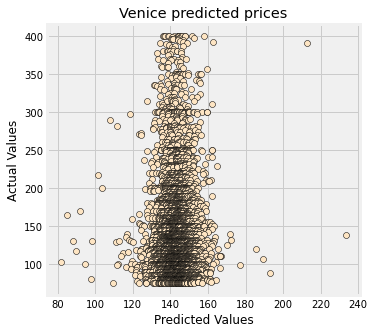

In [27]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Venice predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim